In [1]:
# 주피터 셸에서 모두 출력하는 코드
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 4.1 선형 회귀

## 정규 방정식

In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

In [3]:
X[:10]
y[:10]

array([[0.74908024],
       [1.90142861],
       [1.46398788],
       [1.19731697],
       [0.31203728],
       [0.31198904],
       [0.11616722],
       [1.73235229],
       [1.20223002],
       [1.41614516]])

array([[6.33428778],
       [9.40527849],
       [8.48372443],
       [5.60438199],
       [4.71643995],
       [5.29307969],
       [5.82639572],
       [8.67878666],
       [6.79819647],
       [7.74667842]])

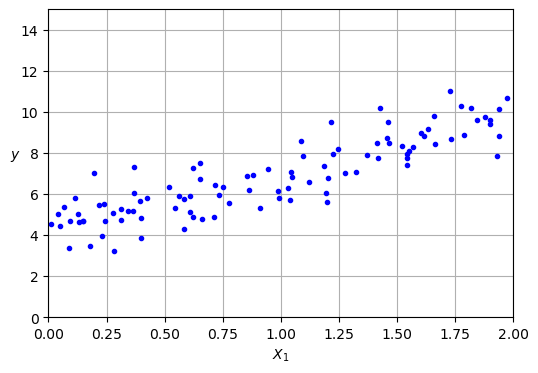

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4));
plt.plot(X, y, "b.");
plt.xlabel("$X_1$");
plt.ylabel("$y$", rotation=0);
plt.axis([0, 2, 0, 15]);
plt.grid();

In [5]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

In [7]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

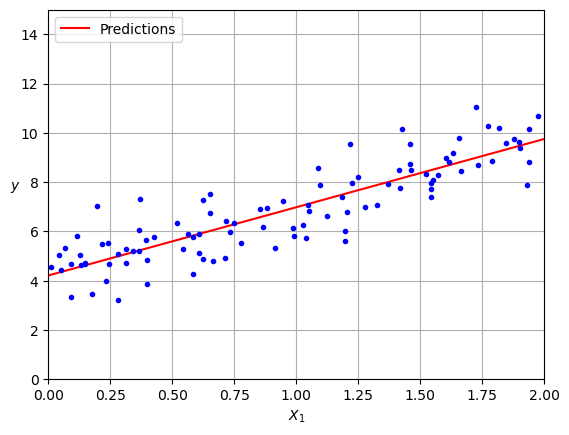

In [8]:
plt.plot(X_new, y_predict, "r-", label="Predictions");
plt.plot(X, y, "b.");
plt.xlabel("$X_1$");
plt.ylabel("$y$", rotation=0);
plt.axis([0, 2, 0, 15]);
plt.grid();
plt.legend(loc="upper left");

In [9]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)    # 선형회귀 모델 학습
lin_reg.intercept_, lin_reg.coef_    # 편향, 가중치 구하기

lin_reg.predict(X_new)

LinearRegression()

(array([4.21509616]), array([[2.77011339]]))

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

# 4.2 경사 하강법

## 4.2.1 배치 경사 하강법

In [20]:
# 배치 경사 하강법
eta = 0.1    # 학습률
n_epochs = 1000
m = len(X_b)    # 샘플 개수

np.random.seed(42)
theta = np.random.randn(2, 1)    # 모델 파라미터를 랜덤하게 초기화

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [21]:
theta

array([[4.21509616],
       [2.77011339]])

## 4.2.2 확률적 경사 하강법

In [19]:
# 확률적 경사 하강법
n_epochs = 50
t0, t1 = 5, 50    # 학습 스케줄 하이퍼파라미터

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for iteration in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index + 1]
        yi = y[random_index:random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)
        theta = theta - eta * gradients

In [22]:
theta

array([[4.21509616],
       [2.77011339]])

In [23]:
# 선형 회귀
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

In [24]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

# 4.3 다항 회귀

In [25]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [26]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]
X_poly[0]

array([-0.75275929])

array([-0.75275929,  0.56664654])

In [27]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

LinearRegression()

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

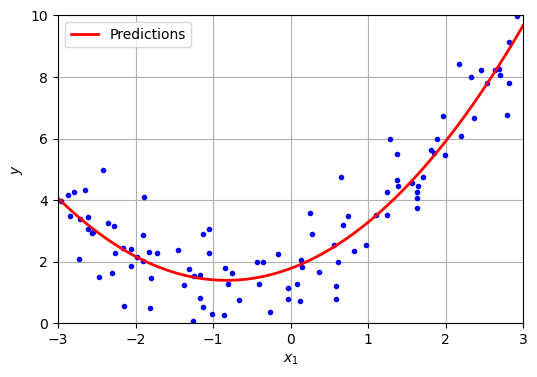

In [40]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(6, 4));
plt.plot(X, y, "b.");
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions");
plt.xlabel("$x_1$");
plt.ylabel("$y$");
plt.legend(loc="upper left");
plt.grid();
plt.axis([-3, 3, 0, 10]);

# 4.4 학습 곡선

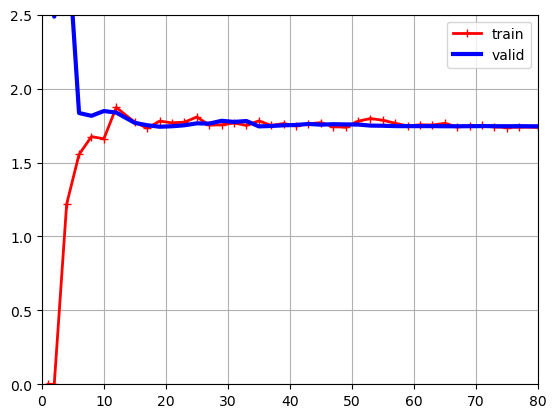

In [48]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train");
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid");
plt.legend(loc="upper right");
plt.axis([0, 80, 0, 2.5]);
plt.grid();

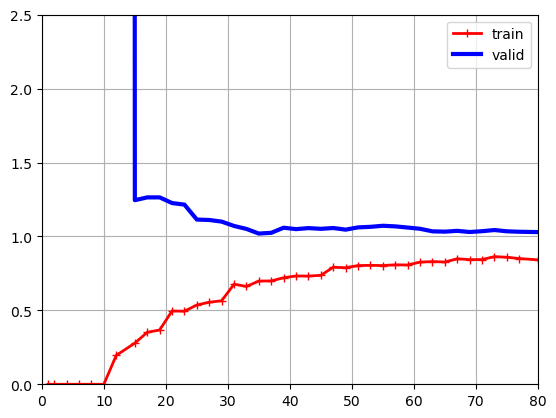

In [49]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="train");
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="valid");
plt.legend(loc="upper right");
plt.axis([0, 80, 0, 2.5]);
plt.grid();

# 4.5 규제가 있는 선형 모델

## 4.5.1 릿지 회귀

In [53]:
# 릿지 회귀 - 매우 작고 잡음이 많은 선형 데이터셋 생성
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

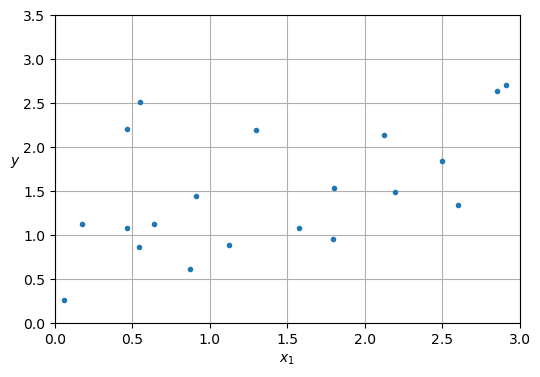

In [55]:
# 그래프
plt.figure(figsize=(6, 4));
plt.plot(X, y, ".");
plt.xlabel("$x_1$");
plt.ylabel("$y$  ", rotation=0);
plt.axis([0, 3, 0, 3.5]);
plt.grid();

In [56]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

Ridge(alpha=0.1, solver='cholesky')

array([[1.55325833]])

In [57]:
sgd_reg = SGDRegressor(penalty="l2", alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

SGDRegressor(alpha=0.005, random_state=42, tol=None)

array([1.55302613])

## 4.5.2 라쏘 회귀

In [59]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

Lasso(alpha=0.1)

array([1.53788174])

## 4.5.3 엘라스틱넷

In [60]:
from sklearn.linear_model import ElasticNet
elasric_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elasric_net.fit(X, y)
elasric_net.predict([[1.5]])

ElasticNet(alpha=0.1)

array([1.54333232])

In [62]:
from copy import deepcopy
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = make_pipeline(PolynomialFeatures(degree=90, include_bias=False),
                              StandardScaler())
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = mean_squared_error(y_valid, y_valid_predict, squared=False)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)

SGDRegressor(eta0=0.002, penalty=None, random_state=42)